# Customer Churn Analysis and Prediction

Customer churn refers to customers who stop doing business with a company during a given period.

In subscription businesses (telecom, SaaS, streaming, banking):

A customer is considered churned when they cancel, do not renew, or switch to a competitor.

In your dataset, Churn = Yes means the customer left the company.

Simple example:
If a telecom company has 1,000 customers and 50 cancel their service this month, the churn rate is 5%.

###Why churn measurement and reduction is important

A. **Financial importance**

Acquiring new customers costs more than retaining existing ones

Churn directly reduces Revenue Lifetime customer value (CLV) and Profit margins

B. **Business stability**

High churn indicates Customer dissatisfaction, Poor service quality, Weak competitive positioning

C. **Strategic advantage**

Identifying churn drivers helps companies Improve products and pricing, Optimize service bundles and Design targeted retention campaigns

D. **Data-driven decision making**

Churn analysis enables Personalized offers, Proactive customer support and Contract and pricing optimization

*Reducing churn by just 5% can increase profits by 25–95%*

####Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go


from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.stats import shapiro, chi2_contingency
import scipy.stats as stats
import statsmodels.api as sm

import math

from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression


from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from statsmodels.formula.api import ols
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


import pytz
import datetime

In [2]:
cus_data = pd.read_csv("Customers_details.csv")
cus_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [68]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


## Data Cleaning and Preparation

In [4]:
cus_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [5]:
cus_data.describe(include= "all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,3186-AJIEK,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [6]:
cus_data.dtypes.value_counts()

,count
object,18
int64,2
float64,1


In [7]:
cus_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [8]:
cus_data.dtypes.value_counts()

,count
object,18
int64,2
float64,1


In [9]:
cus_data["gender"].value_counts()

,count
gender,
Male,3555
Female,3488


In [10]:
cus_data["SeniorCitizen"].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [11]:
cus_data["Partner"].value_counts()

,count
Partner,
No,3641
Yes,3402


In [12]:
cus_data["Dependents"].value_counts()

,count
Dependents,
No,4933
Yes,2110


In [13]:
cus_data["tenure"].value_counts()

,count
tenure,
1,613
72,362
2,238
3,200
4,176
...,...
28,57
39,56
44,51


In [14]:
cus_data["PhoneService"].value_counts()

,count
PhoneService,
Yes,6361
No,682


In [15]:
cus_data["MultipleLines"].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [16]:
cus_data["InternetService"].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [17]:
cus_data["OnlineSecurity"].value_counts()

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


In [18]:
cus_data["OnlineBackup"].value_counts()

,count
OnlineBackup,
No,3088
Yes,2429
No internet service,1526


In [19]:
cus_data["DeviceProtection"].value_counts()

,count
DeviceProtection,
No,3095
Yes,2422
No internet service,1526


In [20]:
cus_data["TechSupport"].value_counts()

,count
TechSupport,
No,3473
Yes,2044
No internet service,1526


In [21]:
cus_data["StreamingTV"].value_counts()

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


In [22]:
cus_data["StreamingMovies"].value_counts()

,count
StreamingMovies,
No,2785
Yes,2732
No internet service,1526


In [23]:
cus_data["Contract"].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [24]:
cus_data["PaperlessBilling"].value_counts()

,count
PaperlessBilling,
Yes,4171
No,2872


In [25]:
cus_data["PaymentMethod"].value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [26]:
cus_data["MonthlyCharges"].value_counts()

,count
MonthlyCharges,
20.05,61
19.85,45
19.95,44
19.90,44
20.00,43
...,...
56.85,1
101.70,1
48.40,1


In [27]:
cus_data["TotalCharges"].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
130.15,1
3211.9,1
7843.55,1


In [139]:
cus_data.loc[[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], "TotalCharges"] = 0.0

In [141]:
cus_data["TotalCharges"]= cus_data["TotalCharges"].astype("float")

In [142]:
cus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


##Exploratory Data Analysis

<Axes: xlabel='Churn'>

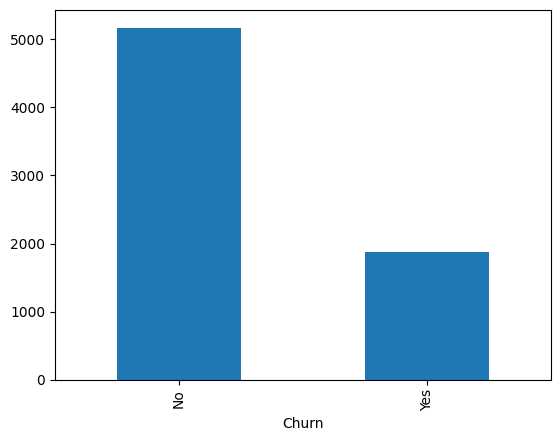

In [28]:
cus_data["Churn"].value_counts().plot(kind= "bar")

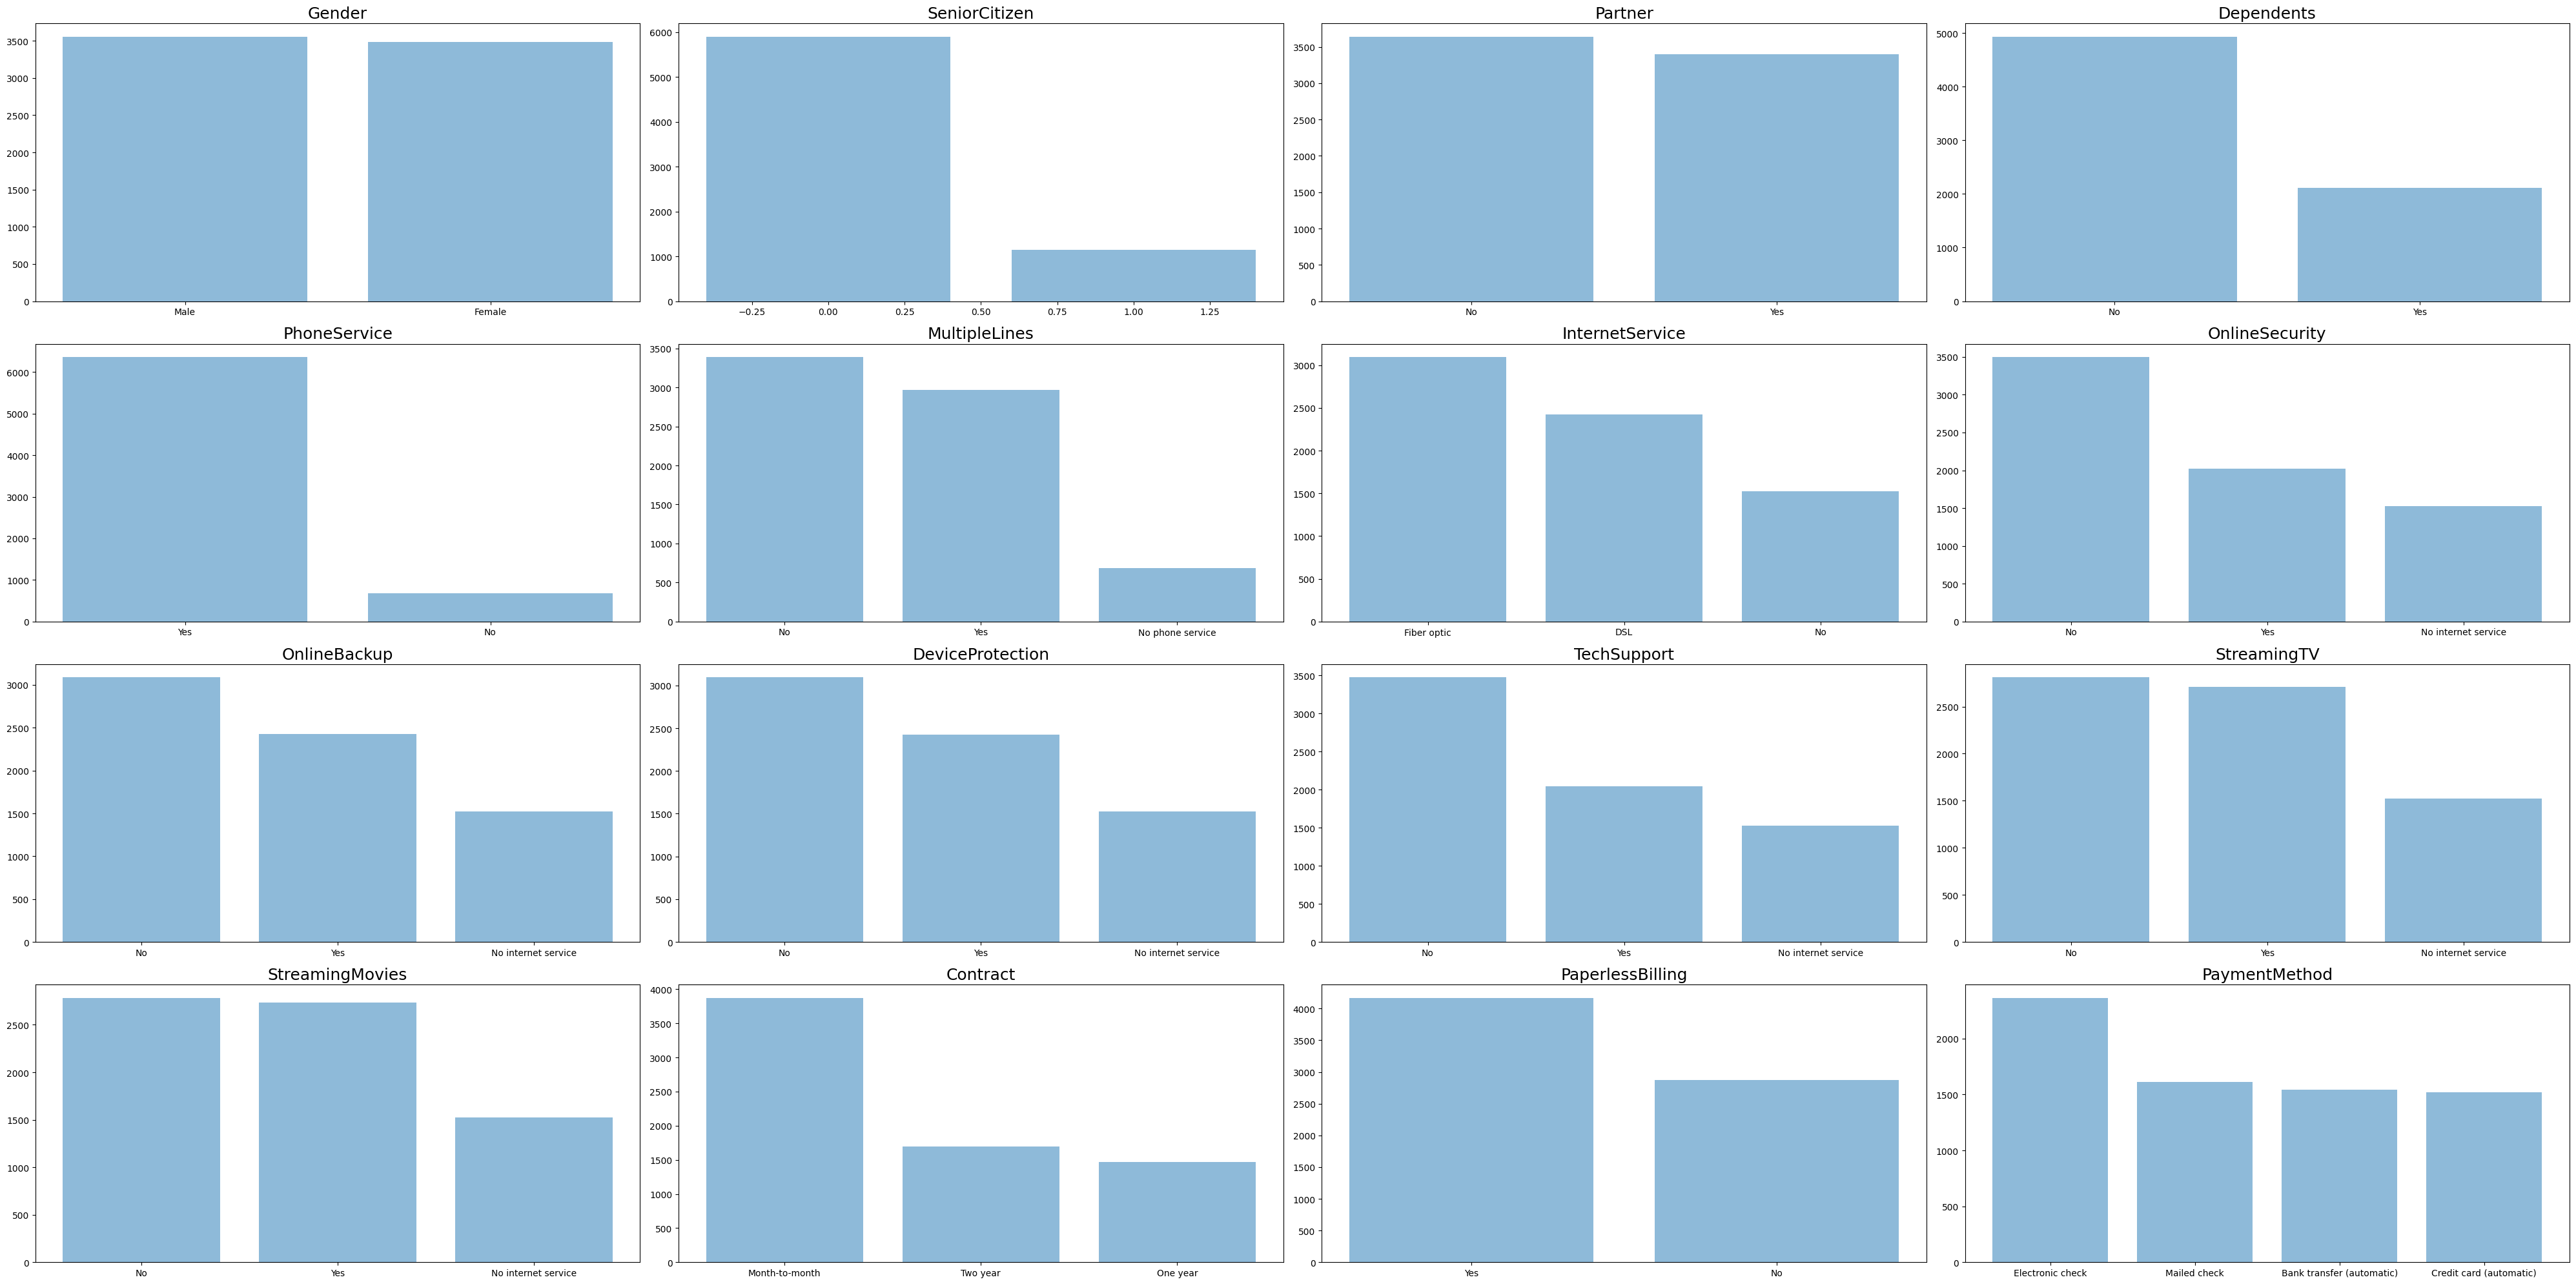

In [29]:
fig, ax = plt.subplots(nrows = 4, ncols = 4, figsize = (40,20))

palette = sns.color_palette('rainbow_r')
ax[0,0].bar(cus_data["gender"].value_counts().index, cus_data["gender"].value_counts().values, alpha=0.5)
ax[0,0].set_title("Gender", fontsize = 18)
# ax[0,0].set_xlabel("Actual Values", fontsize = 12)
# ax[0,0].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[0,0].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[0,1].bar(cus_data["SeniorCitizen"].value_counts().index, cus_data["SeniorCitizen"].value_counts().values, alpha=0.5)
ax[0,1].set_title("SeniorCitizen", fontsize = 18)
# ax[0,1].set_xlabel("Actual Values", fontsize = 12)
# ax[0,1].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[0,1].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[0,2].bar(cus_data["Partner"].value_counts().index, cus_data["Partner"].value_counts().values, alpha=0.5)
ax[0,2].set_title("Partner", fontsize = 18)
# ax[0,2].set_xlabel("Actual Values", fontsize = 12)
# ax[0,2].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[0,2].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[0,3].bar(cus_data["Dependents"].value_counts().index, cus_data["Dependents"].value_counts().values, alpha=0.5)
ax[0,3].set_title("Dependents", fontsize = 18)
# ax[0,3].set_xlabel("Actual Values", fontsize = 12)
# ax[0,3].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[0,3].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[1,0].bar(cus_data["PhoneService"].value_counts().index, cus_data["PhoneService"].value_counts().values, alpha=0.5)
ax[1,0].set_title("PhoneService", fontsize = 18)
# ax[1,0].set_xlabel("Actual Values", fontsize = 12)
# ax[1,0].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[1,0].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[1,1].bar(cus_data["MultipleLines"].value_counts().index, cus_data["MultipleLines"].value_counts().values, alpha=0.5)
ax[1,1].set_title("MultipleLines", fontsize = 18)
# ax[1,1].set_xlabel("Actual Values", fontsize = 12)
# ax[1,1].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[1,1].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[1,2].bar(cus_data["InternetService"].value_counts().index, cus_data["InternetService"].value_counts().values, alpha=0.5)
ax[1,2].set_title("InternetService", fontsize = 18)
# ax[1,2].set_xlabel("Actual Values", fontsize = 12)
# ax[1,2].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[1,2].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[1,3].bar(cus_data["OnlineSecurity"].value_counts().index, cus_data["OnlineSecurity"].value_counts().values, alpha=0.5)
ax[1,3].set_title("OnlineSecurity", fontsize = 18)
# ax[1,3].set_xlabel("Actual Values", fontsize = 12)
# ax[1,3].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[1,3].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[2,0].bar(cus_data["OnlineBackup"].value_counts().index, cus_data["OnlineBackup"].value_counts().values, alpha=0.5)
ax[2,0].set_title("OnlineBackup", fontsize = 18)
# ax[2,0].set_xlabel("Actual Values", fontsize = 12)
# ax[2,0].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[2,0].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[2,1].bar(cus_data["DeviceProtection"].value_counts().index, cus_data["DeviceProtection"].value_counts().values, alpha=0.5)
ax[2,1].set_title("DeviceProtection", fontsize = 18)
# ax[2,1].set_xlabel("Actual Values", fontsize = 12)
# ax[2,1].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[2,1].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[2,2].bar(cus_data["TechSupport"].value_counts().index, cus_data["TechSupport"].value_counts().values, alpha=0.5)
ax[2,2].set_title("TechSupport", fontsize = 18)
# ax[2,2].set_xlabel("Actual Values", fontsize = 12)
# ax[2,2].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[2,2].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[2,3].bar(cus_data["StreamingTV"].value_counts().index, cus_data["StreamingTV"].value_counts().values, alpha=0.5)
ax[2,3].set_title("StreamingTV", fontsize = 18)
# ax[2,3].set_xlabel("Actual Values", fontsize = 12)
# ax[2,3].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[2,3].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[3,0].bar(cus_data["StreamingMovies"].value_counts().index, cus_data["StreamingMovies"].value_counts().values, alpha=0.5)
ax[3,0].set_title("StreamingMovies", fontsize = 18)
# ax[3,0].set_xlabel("Actual Values", fontsize = 12)
# ax[3,0].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[3,0].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[3,1].bar(cus_data["Contract"].value_counts().index, cus_data["Contract"].value_counts().values, alpha=0.5)
ax[3,1].set_title("Contract", fontsize = 18)
# ax[3,1].set_xlabel("Actual Values", fontsize = 12)
# ax[3,1].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[3,1].axhline(y=0, color="r", linestyle="--")



palette = sns.color_palette('rainbow_r')
ax[3,2].bar(cus_data["PaperlessBilling"].value_counts().index, cus_data["PaperlessBilling"].value_counts().values, alpha=0.5)
ax[3,2].set_title("PaperlessBilling", fontsize = 18)
# ax[3,2].set_xlabel("Actual Values", fontsize = 12)
# ax[3,2].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[3,2].axhline(y=0, color="r", linestyle="--")



# palette = sns.color_palette('rainbow_r')
ax[3,3].bar(cus_data["PaymentMethod"].value_counts().index, cus_data["PaymentMethod"].value_counts().values, alpha=0.5)
ax[3,3].set_title("PaymentMethod", fontsize = 18)
# ax[3,3].set_xlabel("Actual Values", fontsize = 12)
# ax[3,3].set_ylabel("Residuals (Error)", fontsize = 12)
# ax[3,3].axhline(y=0, color="r", linestyle="--")


# plt.title("Visualization of some interested columns")

fig.tight_layout()

In [30]:
cus_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [31]:
cus_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
cus_data[cus_data["TotalCharges"] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No


### Correlation Analysis

In [52]:
corr= cus_data[["tenure", "MonthlyCharges", "TotalCharges"]].corr()

<Axes: >

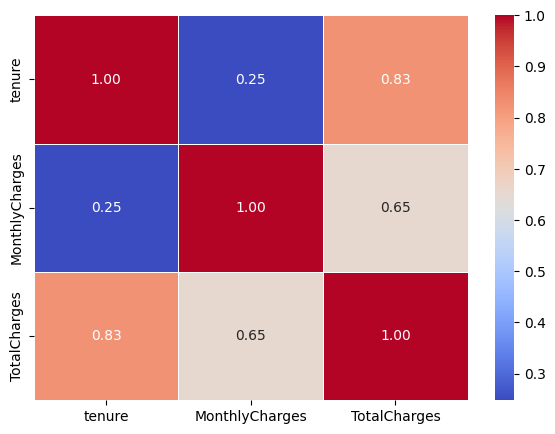

In [55]:
plt.figure(figsize=(7, 5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

### Predictive Modeling

#### Feature Engineering

In [59]:
cus_data.drop(columns= "customerID", inplace= True)

In [60]:
cus_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
def apply_label_encoder(data, columns):
    for column in columns:
        le= LabelEncoder()
        data[column]= le.fit_transform(data[column])
    return data

In [82]:
categorical_columns= list(cus_data.select_dtypes(include= [object]).columns)
categorical_columns

[]

In [69]:
transformed_data= apply_label_encoder(cus_data, categorical_columns)
transformed_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,75,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3625,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,537,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,3571,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,675,1


In [72]:
x_data= cus_data.drop(columns= "Churn")
y_data= cus_data["Churn"]

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42, stratify= y_data)

In [79]:
y_test.head()

,Churn
437,0
2280,0
2235,0
4460,0
3761,0


In [80]:
categorical_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [93]:
x_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [94]:
numerics= ["tenure", "MonthlyCharges", "TotalCharges"]
categorical_data= ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [108]:
preprocessor= ColumnTransformer(transformers= [
    ("cat", OneHotEncoder(drop= "first"), categorical_data),
     ("num", StandardScaler(), numerics)],
                                remainder= "passthrough")

#### Model 1 [Using Logistic Regression]

In [109]:
model1= Pipeline(steps= [("preprocessor", preprocessor), ("classifier", LogisticRegression())])
model1

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', LogisticRegression())])

In [110]:
model1.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', LogisticRegression())])

In [111]:
pred= model1.predict(x_train)
model1.score(x_train, y_train)

0.8106141285055023

<Axes: >

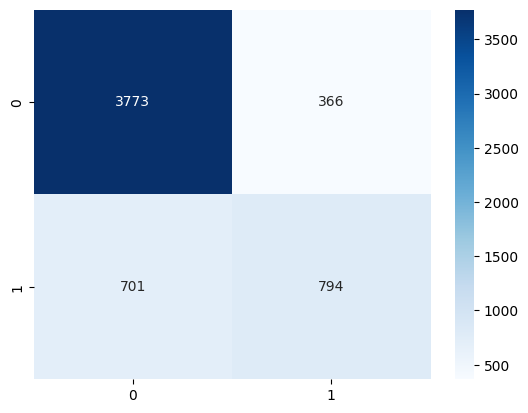

In [112]:
cm= confusion_matrix(y_train, pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

In [113]:
pred1= model1.predict(x_test)
model1.score(x_test, y_test)

0.8005677785663591

In [114]:
conf_mat= confusion_matrix(y_test, pred1)
conf_mat

array([[940,  95],
       [186, 188]])

In [115]:
classification_report(y_test, pred1)

'              precision    recall  f1-score   support\n\n           0       0.83      0.91      0.87      1035\n           1       0.66      0.50      0.57       374\n\n    accuracy                           0.80      1409\n   macro avg       0.75      0.71      0.72      1409\nweighted avg       0.79      0.80      0.79      1409\n'

<Axes: >

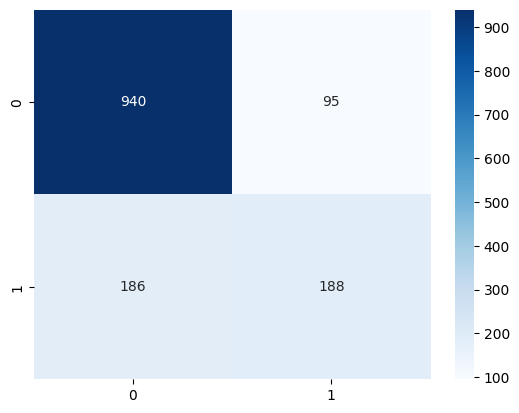

In [116]:
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))


#### Model 2[Using Random Forest Classifier]

In [117]:
model2= Pipeline(steps= [("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])
model2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', RandomForestClassifier())])

In [118]:
model2.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod']),
                                                 ('num', StandardScaler(),
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('classifier', RandomForestClassifier())])

In [119]:
predd= model2.predict(x_train)
model2.score(x_train, y_train)

0.9980475683351083

<Axes: >

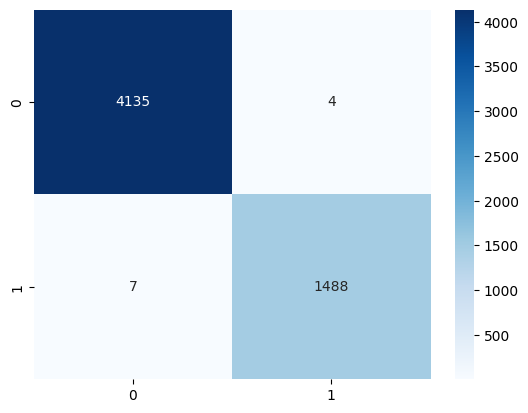

In [120]:
cm= confusion_matrix(y_train, predd)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_train), yticklabels=np.unique(y_train))

In [121]:
pred2= model2.predict(x_test)
model2.score(x_test, y_test)

0.794180269694819

In [122]:
conf_mat2= confusion_matrix(y_test, pred2)
conf_mat2

array([[930, 105],
       [185, 189]])

<Axes: >

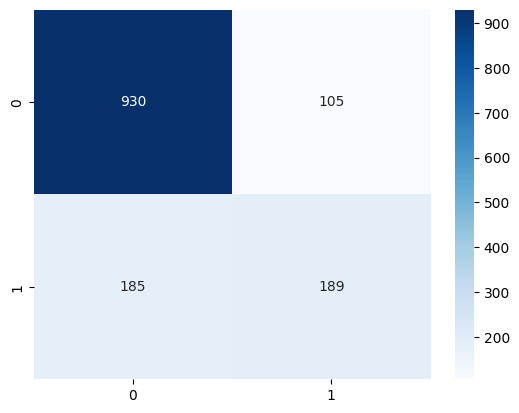

In [123]:
sns.heatmap(conf_mat2, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))

In [128]:
model2.named_steps['classifier'].feature_importances_
ohe = preprocessor.named_transformers_['cat']
ohe_features = ohe.get_feature_names_out(categorical_data)
feature_names = np.concatenate([ohe_features, numerics])

In [130]:
imp= pd.Series(model2.named_steps['classifier'].feature_importances_, index= feature_names)
imp

,0
gender_1,0.028664
SeniorCitizen_1,0.020358
Partner_1,0.024390
Dependents_1,0.019017
PhoneService_1,0.003855
MultipleLines_1,0.004223
MultipleLines_2,0.019902
InternetService_1,0.039696
InternetService_2,0.008615
OnlineSecurity_1,0.005016


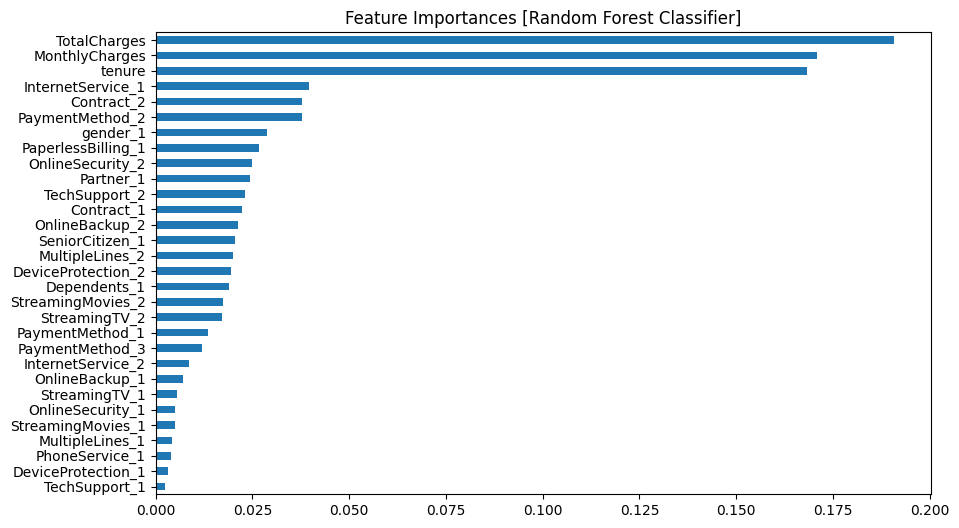

In [134]:
plt.figure(figsize= (10, 6))

imp.sort_values(ascending= True).plot(kind= "barh")
plt.title("Feature Importances [Random Forest Classifier]");

### Post-dictive Analysis

## Postdictive Analysis

### Overview

Postdictive analysis examines **historical churn outcomes** to understand **why customers churned** and whether the model’s predictions align with known outcomes.

---

### Key Observations

#### 1. Contract Type

* Customers on **month-to-month contracts** showed significantly higher churn.
* Long-term contracts (1–2 years) strongly correlate with customer retention.

#### 2. Tenure

* Customers with **short tenure** were more likely to churn.
* Loyalty increases as tenure grows, reducing churn probability.

#### 3. Monthly Charges

* Higher monthly charges are associated with higher churn.
* Customers paying more without perceived added value tend to leave.

#### 4. Service Add-ons

* Customers **without tech support or online security** churned more often.
* Value-added services improve stickiness.

#### 5. Payment Method

* Customers using **electronic checks** showed higher churn compared to automated payments (credit card, bank transfer).

---

### Model Performance Insight

* The model was able to correctly identify a significant portion of churned customers.
* False negatives (missed churners) represent lost retention opportunities.
* Feature importance analysis confirms that **contract type, tenure, and monthly charges** are the strongest churn predictors.

---

### Limitations

* Behavioral data (complaints, customer satisfaction) is not included.
* External factors (competition, promotions) are not captured.
* Class imbalance may slightly bias predictions.

### Business recommendations

## Business Recommendations

### 1. Strengthen Long-Term Contracts

* Offer discounts or incentives for customers switching from month-to-month to long-term plans.
* Introduce loyalty rewards for contract renewals.

---

### 2. Target High-Risk Customers Early

* Focus retention campaigns on:

  * New customers (low tenure)
  * High monthly charge customers
* Proactively engage them within the first few months.

---

### 3. Bundle Value-Added Services

* Promote tech support, online security, and device protection as bundled offerings.
* Highlight value rather than cost.

---

### 4. Optimize Pricing Strategy

* Review high-cost plans with high churn rates.
* Introduce flexible or tiered pricing options.

---

### 5. Improve Payment Experience

* Encourage automatic payment methods through incentives.
* Reduce friction in billing and payment processes.

---

### 6. Use Predictive Insights Operationally

* Integrate churn predictions into CRM systems.
* Trigger retention actions (emails, calls, offers) for high-risk customers.

---

## Conclusion

By leveraging predictive analytics and postdictive insights, the business can shift from reactive churn management to **proactive customer retention**, improving customer lifetime value and long-term profitability.